Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Lyubomira Dimitrova"
COLLABORATORS = "Maryna Charniuk, Jung Nguyen(SPANKUS)"

---

#  Einleitung
In dieser Aufgabe soll Ihr Verständnis von Sortieralgorithmen gestärkt werden. Stellen Sie sicher, dass sie das Archiv samt Test-Dateien heruntergeladen und in einen Unterordner `test_cases` extrahiert haben (Quelle: http://blog.quibb.org/2008/11/sort-optimization/). Öffnen Sie den Ordner und schauen Sie sich den Schema an, nachdem die Dateien benannt sind.




# Sortierverfahren implementieren (6⋅4 Pkt.)
Implementieren Sie folgende Sortieralgorithmen.

- Selectionsort
- Insertionsort
- Quicksort
- Bubblesort
- Mergesort
- Heapsort

Die Sortieralgorithmen sollen eine sortierte Kopie der ursprünglichen Liste zurück geben und das Original nicht verändern (damit das Verhalten kongruent zu `sorted()`) ist.


In [127]:
def selectionsort(data):
    data = data[:]
    for i in range(len(data) - 1):
        least = i
        for j in range(i + 1, len(data)):
            if data[least] > data[j]:
                least = j
        data[least], data[i] = data[i], data[least]
    return data


def insertionsort(data):
    data = data[:]
    for i in range(1, len(data)):
        current_value = data[i]
        position = i
        while position > 0 and data[position - 1] > current_value:
            data[position] = data[position - 1]
            position -= 1
        data[position] = current_value
    return data


def bubblesort(data):
    data = data[:]
    n = len(data)
    for j in range(n - 1):
        for i in range(n - j - 1):
            if data[i] > data[i + 1]:
                data[i], data[i + 1] = data[i + 1], data[i]
    return data


def quicksort(data):
    
    data = data[:]
    if len(data) > 1: 
        p = partition(data)
        left = quicksort(data[: p])
        right = quicksort(data[p + 1 :])
        
        return left + [data[p]] + right
    else:
        return data


def partition(data):
    pivot = data[-1]
    i = -1
    for j in range(len(data)):
        if data[j] < pivot:
            i += 1
            data[i], data[j] = data[j], data[i]
            
    data[i+1], data[-1] = data[-1], data[i+1]
    
    return i + 1         # the index of the pivot element, sorted in its correct place in the list


def make_min_heap(data):
    heap = []

    for elm in data:
        heap.append(elm)
        i = len(heap) - 1     
        while i > 0:            # maintain heap property
            parent = (i - 1) // 2
            if heap[i] < heap[parent]:
                heap[i], heap[parent] = heap[parent], heap[i]
            i = parent

    return heap
    

def heapsort(data):

    heap = make_min_heap(data)
    sorted_data = []
    
    while heap:
        heap[0], heap[-1] = heap[-1], heap[0]
        sorted_data.append(heap.pop())
        heap = make_min_heap(heap)

    return sorted_data
 
    
    
def merge(left, right):

    merged = []
    i = 0
    j = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    while i < len(left):
        merged.append(left[i])
        i += 1

    while j < len(right):
        merged.append(right[j])
        j += 1

    return merged


def mergesort(data):

    if len(data) > 1:
        middle = len(data) // 2
        left_half = data[:middle]
        right_half = data[middle:]

        sorted_left = mergesort(left_half)
        sorted_right = mergesort(right_half)

        return merge(sorted_left, sorted_right)

    else:
        return data


In [128]:
import random

SAMPLE_LIST = random.sample(range(100), 30)

def test_algorithm(algorithm):
    sample_list = SAMPLE_LIST[:]
    print(sample_list)
    print(algorithm(sample_list))
    assert algorithm(sample_list) == sorted(sample_list), "{} did not sort the list".format(algorithm.__name__)
    assert sample_list == SAMPLE_LIST, "{} altered the original".format(algorithm.__name__)

In [129]:
test_algorithm(selectionsort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


In [130]:
test_algorithm(insertionsort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


In [131]:
test_algorithm(bubblesort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


In [132]:
test_algorithm(quicksort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


In [133]:
test_algorithm(heapsort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


In [134]:
test_algorithm(mergesort)

[32, 8, 70, 49, 40, 31, 77, 64, 85, 61, 25, 99, 91, 1, 44, 39, 62, 93, 95, 98, 89, 43, 71, 41, 86, 34, 57, 97, 46, 18]
[1, 8, 18, 25, 31, 32, 34, 39, 40, 41, 43, 44, 46, 49, 57, 61, 62, 64, 70, 71, 77, 85, 86, 89, 91, 93, 95, 97, 98, 99]


# Einlesen von Dateien (4 Pkt.)
Schreiben sie eine Funktion `load_test_cases(path)`, die zu den zur Verfügung gestellten Testfällen jeweils die Datei mit 10e3 Einträgen lädt.

In [135]:
import os

TEST_CASE_PATH = "test_files"

def load_test_cases(path):
    """
    Args:
    path string
    
    Returns:
    test_cases dictionary 
    """
    test_cases = {}
    path = os.path.join(path, '')    # adds trailing slash

    for entry in os.scandir(path):
        if entry.name.endswith(".10000.txt"):
            test_cases[entry.name.replace(".10000.txt", "")] = [int(x) for x in open(path + entry.name).read().strip().split('\n')]
                                                          
    return test_cases


In [136]:
import unittest

unittest_test_case = unittest.TestCase('__init__')

loaded_test_cases = load_test_cases(TEST_CASE_PATH)
available_test_cases = ['1245.repeat', 'end.0', 'identical', 'med.3.killer', 'rand.dups', 'rand.no.dups', 'rand.steps', 
                        'rev.ends', 'rev.partial', 'rev.saw', 'reverse', 'seq.0.is.1000', 'seq.partial', 'seq.saw', 'sequential']

unittest_test_case.assertCountEqual(loaded_test_cases.keys(), available_test_cases)

for key, value in loaded_test_cases.items():
    assert len(value) == 10e3, "Number of testcases mismatch for {}".format(key)

# Sortierverfahren testen (12 Pkt.)
 Vergleichen Sie die Sortierverfahren untereinander und mit der Python Funktion `sorted()`
 - Benutzen sie `result = %timeit -n 100 -r 3 -o` um die Ausführung zu messen und das Ergebnis in einer Variablen speichern zu können. Auf das beste Ergebnis können Sie mit `result.best` zugreifen.
 - Gruppieren Sie die Ergebnisse nach Testfall.
 - Testen sie folgende „Splices“ Ihres Testdatensatzes: `x_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`
 - Stellen sie die Ergebnisse mittels Tabelle und Graphen mit Titel und Achsenbeschriftung dar (Matplotlib).
 - Bewerten Sie das Ergebnis

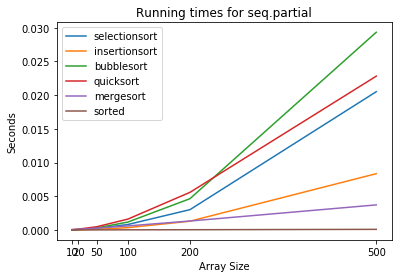

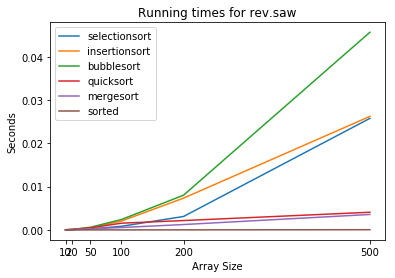

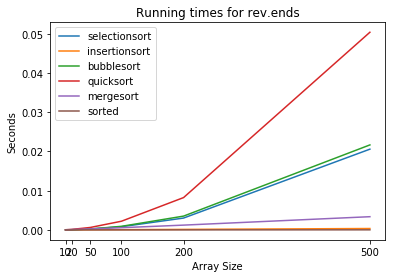

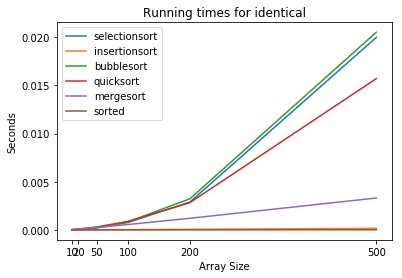

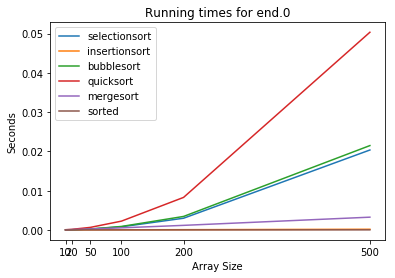

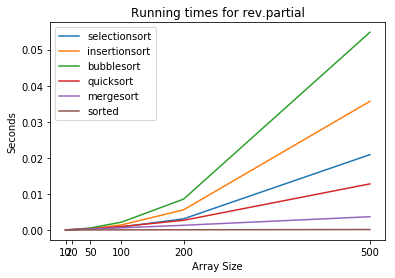

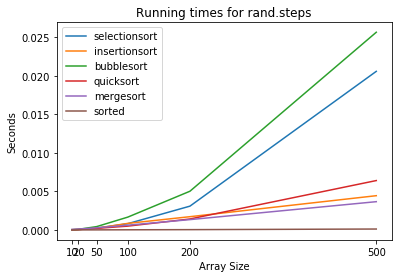

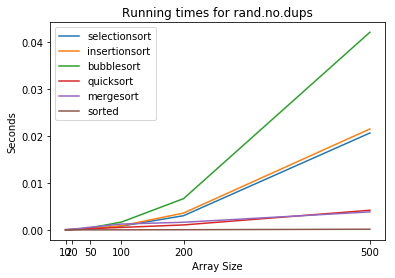

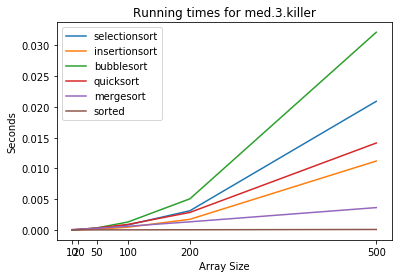

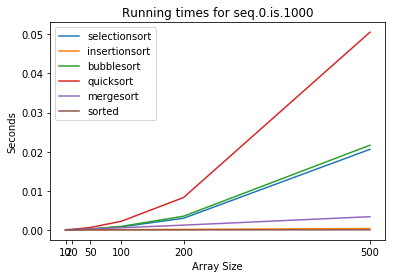

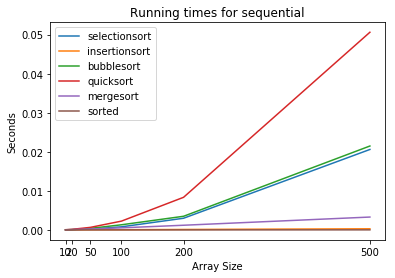

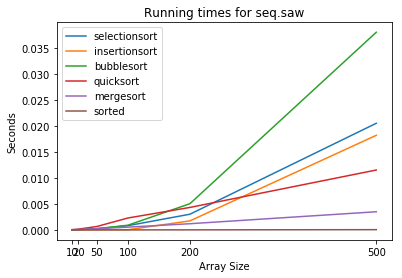

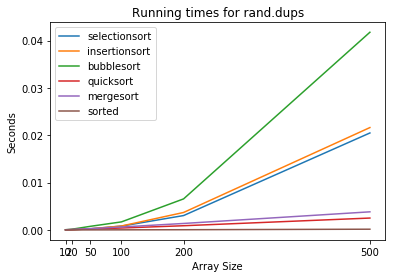

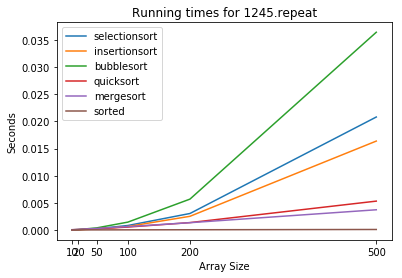

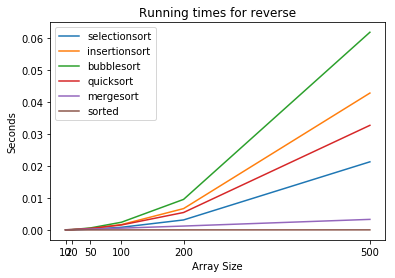

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
# for quicksort
import sys
sys.setrecursionlimit(20000)


def get_times(algorithm, testset):
    times = []
    for val in x_values:
        result = %timeit -n 10 -r 3 -o -q algorithm(testset[:val])
        times.append(result.best)
    return times

x_values = [10, 20, 50, 100, 200, 500]
    
for case in loaded_test_cases:
    
    plt.cla()
    
    plt.plot(x_values, get_times(selectionsort, loaded_test_cases[case]))
    plt.plot(x_values, get_times(insertionsort, loaded_test_cases[case]))
    plt.plot(x_values, get_times(bubblesort, loaded_test_cases[case]))
    plt.plot(x_values, get_times(quicksort, loaded_test_cases[case]))
    #plt.plot(x_values, get_times(heapsort, loaded_test_cases[case])) # wayyy too slow (out-of-place implementation?)
    plt.plot(x_values, get_times(mergesort, loaded_test_cases[case]))
    plt.plot(x_values, get_times(sorted, loaded_test_cases[case]))

    plt.title("Running times for " + case)
    plt.xlabel("Array Size")
    plt.ylabel("Seconds")
    plt.xticks(x_values)
    plt.legend(['selectionsort', 'insertionsort', 'bubblesort', 'quicksort', 'mergesort', 'sorted'], loc='upper left')
    
    plt.show()
    #plt.waitforbuttonpress()            # only when not inline
    
    
    
       
    


Bewertung:

In den meisten Fällen hat Bubblesort die langsamste Laufzeit.
Quicksort ist überraschenderweise für einige Datensätze (sequential, seq.0.is.1000, end.0, rev.ends) ziemlich schlecht geeignet, was aber an der out-of-place Implementierung liegen könnte.+
Insgesamt sortiert die Python-Funktion sorted am schnellsten (klar), wobei Mergesort sich oft daran annähert.

Es ist wichtig zu erwähnen, dass $Laufzeit \neq Komplexität$. Unsere Heapsort-Implementierung war viel zu langsam, obwohl der Algorithmus von $O(n\log(n))$ ist.